In [1]:
from mpl_toolkits.basemap import Basemap
import pandas as pd
import requests
from bs4 import BeautifulSoup as BS
from IPython.core.display import HTML
from io import StringIO
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import string
import ipywidgets as widgets

%matplotlib inline

# https://en.wikipedia.org/wiki/List_of_deadly_earthquakes_since_1900

In [2]:
response = requests.get('https://en.wikipedia.org/wiki/List_of_deadly_earthquakes_since_1900')

In [3]:
type(response)

requests.models.Response

In [4]:
response.status_code

200

In [5]:
#this shows what you got from the response. 
response.text

'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>List of deadly earthquakes since 1900 - Wikipedia</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_deadly_earthquakes_since_1900","wgTitle":"List of deadly earthquakes since 1900","wgCurRevisionId":917793754,"wgRevisionId":917793754,"wgArticleId":11673441,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 errors: missing periodical","Articles needing additional references from July 2017","All articles needing additional references","Articles needing cleanup from July 2017","All pages needing cleanup","Cleanup tagged articles with a reason field from July 2017","Wikipedia pages needing cleanup from July 2017","Articles with obsolete information from July 2017","All Wikipedia articles in need of upda

In [6]:
soup = BS(response.text, 'html.parser')

In [7]:
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of deadly earthquakes since 1900 - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_deadly_earthquakes_since_1900","wgTitle":"List of deadly earthquakes since 1900","wgCurRevisionId":917793754,"wgRevisionId":917793754,"wgArticleId":11673441,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 errors: missing periodical","Articles needing additional references from July 2017","All articles needing additional references","Articles needing cleanup from July 2017","All pages needing cleanup","Cleanup tagged articles with a reason field from July 2017","Wikipedia pages needing cleanup from July 2017","Articles with obsolete information from July 2017","All Wikipedia articles in 

In [8]:
soup.findAll('table')

[<table class="box-Multiple_issues plainlinks metadata ambox ambox-content ambox-multiple_issues compact-ambox" role="presentation"><tbody><tr><td class="mbox-image"><div style="width:52px"><img alt="" data-file-height="40" data-file-width="40" decoding="async" height="40" src="//upload.wikimedia.org/wikipedia/en/thumb/b/b4/Ambox_important.svg/40px-Ambox_important.svg.png" srcset="//upload.wikimedia.org/wikipedia/en/thumb/b/b4/Ambox_important.svg/60px-Ambox_important.svg.png 1.5x, //upload.wikimedia.org/wikipedia/en/thumb/b/b4/Ambox_important.svg/80px-Ambox_important.svg.png 2x" width="40"/></div></td><td class="mbox-text"><div class="mbox-text-span"><div class="mw-collapsible" style="width:95%; margin: 0.2em 0;"><b>This article has multiple issues.</b> Please help <b><a class="external text" href="https://en.wikipedia.org/w/index.php?title=List_of_deadly_earthquakes_since_1900&amp;action=edit">improve it</a></b> or discuss these issues on the <b><a href="/wiki/Talk:List_of_deadly_eart

In [9]:
soup.find('table', attrs={'class' : 'sortable wikitable'})

<table class="sortable wikitable">
<tbody><tr bgcolor="#CCCCCC">
<th width="22%">Origin (<a class="mw-redirect" href="/wiki/UTC" title="UTC">UTC</a>)</th>
<th width="33%">Present-day country and link to Wikipedia article</th>
<th width="10%"><a href="/wiki/Latitude" title="Latitude">Lat</a></th>
<th width="10%"><a href="/wiki/Longitude" title="Longitude">Long</a></th>
<th width="8%">Depth (<a class="mw-redirect" href="/wiki/Km" title="Km">km</a>)</th>
<th width="6%">Magnitude</th>
<th width="9%">Secondary Effects</th>
<th width="10%">PDE Shaking Deaths</th>
<th width="10%">PDE Total Deaths</th>
<th width="10%">Utsu Total Deaths</th>
<th width="10%">EM-DAT Total Deaths</th>
<th width="12%">Other Source Deaths
</th></tr>
<tr>
<td>1900-05-11 17:23</td>
<td>Japan</td>
<td>38.700</td>
<td>141.100</td>
<td>5</td>
<td>7.0 <a href="/wiki/Seismic_magnitude_scales#Mjma" title="Seismic magnitude scales"><span class="rt-commentedText" title="JMA mag.">M<sub>JMA</sub></span></a></td>
<td></td>
<td>

In [10]:
table_html = str(soup.find('table', attrs={'class' : 'sortable wikitable'}))

HTML(table_html)

In [11]:
tables = pd.read_html(table_html)

In [12]:
tables

[          Origin (UTC) Present-day country and link to Wikipedia article  \
 0     1900-05-11 17:23                                             Japan   
 1     1900-07-12 06:25                                            Turkey   
 2     1900-10-29 09:11                                         Venezuela   
 3     1901-02-15 00:00                                             China   
 4     1901-03-31 07:11                                          Bulgaria   
 5     1901-08-09 09:23                                             Japan   
 6     1901-11-15 20:15         New Zealand (see 1901 Cheviot earthquake)   
 7     1902-01-30 14:01                                             Japan   
 8     1902-02-13 09:39                                        Azerbaijan   
 9     1902-03-09 07:46                                            Turkey   
 10    1902-04-19 02:23         Guatemala (see 1902 Guatemala earthquake)   
 11    1902-07-03 15:36                                             China   

In [13]:
type(tables)

list

In [14]:
earth_table = tables[0]

In [15]:
earth_table.columns

Index(['Origin (UTC)', 'Present-day country and link to Wikipedia article',
       'Lat', 'Long', 'Depth (km)', 'Magnitude', 'Secondary Effects',
       'PDE Shaking Deaths', 'PDE Total Deaths', 'Utsu Total Deaths',
       'EM-DAT Total Deaths', 'Other Source Deaths'],
      dtype='object')

In [16]:
#add an underscore to the empty spaces
earth_table.columns=earth_table.columns.str.replace(' ','_')

In [18]:
#rename the country column
earth_table=earth_table.rename(columns={'Present-day_country_and_link_to_Wikipedia_article':'country'})

In [22]:
#doing this to the country column to porperty remove that links at the end of some of the names
earth_table.country=earth_table.country.str.replace(' ','')
earth_table.country=earth_table.country.str.replace('(',' ')

In [24]:
earth_table.head()

Origin_(UTC)    country     Lat     Long Depth_(km) Magnitude  \
0  1900-05-11 17:23      Japan  38.700  141.100          5  7.0 MJMA   
1  1900-07-12 06:25     Turkey  40.300   43.100        NaN   5.9 Muk   
2  1900-10-29 09:11  Venezuela  11.000  -66.000          0    7.7 Mw   
3  1901-02-15 00:00      China  26.000  100.100          0    6.5 Ms   
4  1901-03-31 07:11   Bulgaria  43.400   28.700        NaN   6.4 Muk   

  Secondary_Effects  PDE_Shaking_Deaths  PDE_Total_Deaths  Utsu_Total_Deaths  \
0               NaN                 NaN               NaN                NaN   
1               NaN                 NaN               NaN              140.0   
2               NaN                 NaN               NaN                NaN   
3               NaN                 NaN               NaN                NaN   
4               NaN                 NaN               NaN                4.0   

  EM-DAT_Total_Deaths Other_Source_Deaths  
0                 NaN                 NaN  
1                 NaN                 NaN  
2                 NaN                 NaN  
3                 NaN                 NaN  
4                 NaN                 NaN

In [25]:
#create a funcition. I only want the name of country and not the link. also use the same
#function to only get the digit in magnitude

def only_one(x):
    #need to put the str()otherwise the fuction will not work in the magnitute column
    #because the magnitude column has a NaN value.
    split=str(x).split(' ')
    
    if len(split)==1:
        single=x
    else:
        single=split[0]
        
    return single
        

In [26]:
%%time
#use the function to get just the country without the link
earth_table.country=earth_table.country.apply(only_one)

CPU times: user 1.81 ms, sys: 76 µs, total: 1.88 ms
Wall time: 1.84 ms


In [27]:
%%time 
#now apply the same function to Magnitude to get only the digit value 
earth_table.Magnitude=earth_table['Magnitude'].apply(only_one)

CPU times: user 1.97 ms, sys: 102 µs, total: 2.07 ms
Wall time: 2.03 ms


In [28]:
earth_table.head()

Origin_(UTC)    country     Lat     Long Depth_(km) Magnitude  \
0  1900-05-11 17:23      Japan  38.700  141.100          5       7.0   
1  1900-07-12 06:25     Turkey  40.300   43.100        NaN       5.9   
2  1900-10-29 09:11  Venezuela  11.000  -66.000          0       7.7   
3  1901-02-15 00:00      China  26.000  100.100          0       6.5   
4  1901-03-31 07:11   Bulgaria  43.400   28.700        NaN       6.4   

  Secondary_Effects  PDE_Shaking_Deaths  PDE_Total_Deaths  Utsu_Total_Deaths  \
0               NaN                 NaN               NaN                NaN   
1               NaN                 NaN               NaN              140.0   
2               NaN                 NaN               NaN                NaN   
3               NaN                 NaN               NaN                NaN   
4               NaN                 NaN               NaN                4.0   

  EM-DAT_Total_Deaths Other_Source_Deaths  
0                 NaN                 NaN  
1                 NaN                 NaN  
2                 NaN                 NaN  
3                 NaN                 NaN  
4                 NaN                 NaN

In [29]:
#experimental work
cleaned = earth_table['Other_Source_Deaths']
#cleaned = earth_table['Other_Source_Deaths'].str.rstrip(string.digits)

In [30]:
cleaned=cleaned.str.replace(' ','_')

In [31]:
cleaned.value_counts()

1                                      3
601_(as_of_October_30,_2011)           1
34                                     1
185                                    1
231000*[13]_283000*[14]_227898*[15]    1
26271[11]_26000[12]                    1
200                                    1
222,517[17]                            1
120                                    1
2698                                   1
60[16]                                 1
1500[6]                                1
8000+                                  1
2041                                   1
1404                                   1
189                                    1
41                                     1
105000                                 1
521[19]                                1
15894[20]                              1
1115                                   1
46                                     1
215                                    1
68                                     1
42              

In [32]:
#for one in cleaned:
def one_number(y):
    split=str(y).split('_')
    if len(split)==1:
        num=y
        #print(num)
    elif len(split)<=3:
        numm=y.replace(r'*',r'')
        splitt=str(numm).split('_')
        #usedmem=initial_data['USEDMEM'].str.replace(r'(M)',r' \1')
        #s = list(one.split('_'))
        #print(s)
        num=max(splitt)
    else:
        num=y[0:3]
        
    return num

In [33]:
%%time
#experimental work
cleaned=cleaned.apply(one_number)

CPU times: user 1.6 ms, sys: 28 µs, total: 1.63 ms
Wall time: 1.62 ms


In [34]:
#replace spaced with underscores. for the Other Source Deaths column
earth_table.Other_Source_Deaths=earth_table.Other_Source_Deaths.str.replace(' ','_')
#cleaned=cleaned.str.replace(' ','_')

In [35]:
%%time
#get only the highest value if there are multipe number and remove words
earth_table.Other_Source_Deaths=earth_table.Other_Source_Deaths.apply(one_number)

CPU times: user 2.01 ms, sys: 65 µs, total: 2.08 ms
Wall time: 2.04 ms


In [36]:
#experimental work
cleaned=cleaned.str.replace('+','')
cleaned=cleaned.str.replace('[','_')
#cleaned=cleaned.str.replace(' ','_')

In [37]:
#for a in cleaned 
def remove_all(a):
    take_plus=str(a).replace('+','')
    add_sub=take_plus.replace('[','_')
    sub_split=str(add_sub).split('_')
    if len(sub_split)==1:
        single=a
    else:
        remove=str(a).split('_')
        #print(remove[0])
        single=remove[0]
    
    return single
        

In [38]:
%%time
#experimental work
cleaned=cleaned.apply(remove_all)

CPU times: user 2.33 ms, sys: 31 µs, total: 2.36 ms
Wall time: 2.35 ms


In [39]:
#remove and replace varous things to clean up the last 2 columns
earth_table.Other_Source_Deaths=earth_table.Other_Source_Deaths.str.replace('+','')
earth_table.Other_Source_Deaths=earth_table.Other_Source_Deaths.str.replace('[','_')
#remove the comma from the value 222,517
earth_table.Other_Source_Deaths=earth_table.Other_Source_Deaths.str.replace(',','')
earth_table['EM-DAT_Total_Deaths']=earth_table['EM-DAT_Total_Deaths'].str.replace('[','_')

In [40]:
%%time
#this removes all the footnotes and other stuff from the last 2 columns
earth_table.Other_Source_Deaths=earth_table.Other_Source_Deaths.apply(remove_all)
earth_table['EM-DAT_Total_Deaths']=earth_table['EM-DAT_Total_Deaths'].apply(remove_all)

CPU times: user 5.13 ms, sys: 130 µs, total: 5.26 ms
Wall time: 5.17 ms


In [41]:
#change the type to floats for these columns or the highest death column will not 
#be calculated properly 
earth_table.Other_Source_Deaths=earth_table.Other_Source_Deaths.astype('float')
earth_table['EM-DAT_Total_Deaths']=earth_table['EM-DAT_Total_Deaths'].astype('float')

In [42]:
#create a new column that evaluates the 4 total death columns and add the 
#highest value out of the 4 to the new column. call this 'deatht'
#frame['HighScore'] = frame[['test1','test2','test3']].max(axis=1)
earth_table['highest_death']=earth_table[['PDE_Total_Deaths','Utsu_Total_Deaths','EM-DAT_Total_Deaths','Other_Source_Deaths']].max(axis=1)

In [43]:
earth_table.head(5)

Origin_(UTC)    country     Lat     Long Depth_(km) Magnitude  \
0  1900-05-11 17:23      Japan  38.700  141.100          5       7.0   
1  1900-07-12 06:25     Turkey  40.300   43.100        NaN       5.9   
2  1900-10-29 09:11  Venezuela  11.000  -66.000          0       7.7   
3  1901-02-15 00:00      China  26.000  100.100          0       6.5   
4  1901-03-31 07:11   Bulgaria  43.400   28.700        NaN       6.4   

  Secondary_Effects  PDE_Shaking_Deaths  PDE_Total_Deaths  Utsu_Total_Deaths  \
0               NaN                 NaN               NaN                NaN   
1               NaN                 NaN               NaN              140.0   
2               NaN                 NaN               NaN                NaN   
3               NaN                 NaN               NaN                NaN   
4               NaN                 NaN               NaN                4.0   

   EM-DAT_Total_Deaths  Other_Source_Deaths  highest_death  
0                  NaN                  NaN            NaN  
1                  NaN                  NaN          140.0  
2                  NaN                  NaN            NaN  
3                  NaN                  NaN            NaN  
4                  NaN                  NaN            4.0

In [44]:
#converted the origin_(UTC) section to datetime type
earth_table['Origin_(UTC)']=pd.to_datetime(earth_table['Origin_(UTC)'])

In [45]:
earth_table.head()

Origin_(UTC)    country     Lat     Long Depth_(km) Magnitude  \
0 1900-05-11 17:23:00      Japan  38.700  141.100          5       7.0   
1 1900-07-12 06:25:00     Turkey  40.300   43.100        NaN       5.9   
2 1900-10-29 09:11:00  Venezuela  11.000  -66.000          0       7.7   
3 1901-02-15 00:00:00      China  26.000  100.100          0       6.5   
4 1901-03-31 07:11:00   Bulgaria  43.400   28.700        NaN       6.4   

  Secondary_Effects  PDE_Shaking_Deaths  PDE_Total_Deaths  Utsu_Total_Deaths  \
0               NaN                 NaN               NaN                NaN   
1               NaN                 NaN               NaN              140.0   
2               NaN                 NaN               NaN                NaN   
3               NaN                 NaN               NaN                NaN   
4               NaN                 NaN               NaN                4.0   

   EM-DAT_Total_Deaths  Other_Source_Deaths  highest_death  
0                  NaN                  NaN            NaN  
1                  NaN                  NaN          140.0  
2                  NaN                  NaN            NaN  
3                  NaN                  NaN            NaN  
4                  NaN                  NaN            4.0

In [46]:
#add a column with just year
earth_table['year']=earth_table['Origin_(UTC)'].dt.year

In [47]:
earth_table.head()

Origin_(UTC)    country     Lat     Long Depth_(km) Magnitude  \
0 1900-05-11 17:23:00      Japan  38.700  141.100          5       7.0   
1 1900-07-12 06:25:00     Turkey  40.300   43.100        NaN       5.9   
2 1900-10-29 09:11:00  Venezuela  11.000  -66.000          0       7.7   
3 1901-02-15 00:00:00      China  26.000  100.100          0       6.5   
4 1901-03-31 07:11:00   Bulgaria  43.400   28.700        NaN       6.4   

  Secondary_Effects  PDE_Shaking_Deaths  PDE_Total_Deaths  Utsu_Total_Deaths  \
0               NaN                 NaN               NaN                NaN   
1               NaN                 NaN               NaN              140.0   
2               NaN                 NaN               NaN                NaN   
3               NaN                 NaN               NaN                NaN   
4               NaN                 NaN               NaN                4.0   

   EM-DAT_Total_Deaths  Other_Source_Deaths  highest_death  year  
0                  NaN                  NaN            NaN  1900  
1                  NaN                  NaN          140.0  1900  
2                  NaN                  NaN            NaN  1900  
3                  NaN                  NaN            NaN  1901  
4                  NaN                  NaN            4.0  1901

In [48]:
#i will also be removing this row because there is no lat or long values
earth_table[earth_table.Lat=='?']

Origin_(UTC)    country Lat Long Depth_(km) Magnitude  \
413 1963-06-26 04:17:00  Macedonia   ?   ??          ?       6.1   

    Secondary_Effects  PDE_Shaking_Deaths  PDE_Total_Deaths  \
413               NaN                 NaN            1100.0   

     Utsu_Total_Deaths  EM-DAT_Total_Deaths  Other_Source_Deaths  \
413                NaN                  NaN                  NaN   

     highest_death  year  
413         1100.0  1963

In [49]:
#there is a column with the country 'see' which is not a coutry. remove that row.
#delet the row using the index id of the row you want deleted.
earth_table.drop(earth_table[earth_table['Lat']=='?'].index,inplace=True)

In [55]:
#im removing this column because its not a coutry 
earth_table[earth_table.country=='']

Origin_(UTC) country     Lat     Long Depth_(km) Magnitude  \
1033 1997-07-09 19:24:00          10.450  -63.532         10       6.9   

     Secondary_Effects  PDE_Shaking_Deaths  PDE_Total_Deaths  \
1033                 L                81.0              81.0   

      Utsu_Total_Deaths  EM-DAT_Total_Deaths  Other_Source_Deaths  \
1033               81.0                 80.0                  NaN   

      highest_death  year  
1033           81.0  1997

In [56]:
#there is a column with the country 'see' which is not a coutry. remove that row.
#delet the row using the index id of the row you want deleted.
earth_table.drop(earth_table[earth_table['country']==''].index,inplace=True)


### export the clean DATA###

In [57]:
#exported my earth table dataframe to use for other steps
earth_table_df=earth_table.to_csv('data/earth_table.csv',index=None)

### export the clean DATA###

In [58]:
#how many unique years are being represented
earth_table.year.nunique()

113

In [59]:
earth_table.groupby('country')[['Magnitude']].count()

Magnitude
country                                    
Afghanistan                              30
Albania                                   7
Algeria                                  21
Argentina                                11
Armenia                                   2
Australia                                 3
Azerbaijan                                5
Bangladesh                                7
Belgium                                   1
Bolivia                                   3
BosniaandHerzegovina                      3
Brazil                                    1
Bulgaria                                  5
Burma                                    11
Burundi                                   1
Canada                                    3
Chile                                    44
China                                   166
Colombia                                 24
CostaRica                                10
Cuba                                      2
Cyprus                                    3
CzechRepublic                             1
DemocraticRepublicoftheCongo              6
Djibouti                                  1
DominicanRepublic                         5
Ecuador                                  19
Egypt                                     4
ElSalvador                                7
England                                   1
...                                     ...
RussianFederation                        13
Rwanda                                    1
SaintPierreandMiquelon                    1
Samoa                                     1
SaudiArabia/Egypt                         1
Serbia                                    1
Slovenia                                  2
SolomonIslands                            5
SouthAfrica                              14
Spain                                     1
Sudan                                     1
SyrianArabRepublic                        1
Taiwan                                   48
TajikSovietSocialistRepublic              1
Tajikistan                                8
Tanzania                                  4
Tunisia                                   1
Turkey                                   95
Turkmenistan                              4
USTerritoryofAlaska                       1
Uganda                                    1
UnitedStates                             34
UnitedStatesMinorOutlyingIslands          2
Uzbekistan                                4
Vanuatu                                   2
Venezuela                                11
Vietnam                                   1
WallisandFutuna                           1
Yemen                                     3
Yugoslavia                                1

[108 rows x 1 columns]

In [60]:
earth_table.groupby(['year','country'])[['Magnitude']].count()

Magnitude
year country                                
1900 Japan                                 1
     Turkey                                1
     Venezuela                             1
1901 Bulgaria                              1
     China                                 1
     Japan                                 1
     NewZealand                            1
1902 Australia                             1
     Azerbaijan                            1
     China                                 2
     Guatemala                             1
     Japan                                 1
     Turkey                                1
     Uzbekistan                            1
1903 Greece                                1
     Iran                                  1
     Palestine                             1
     Turkey                                2
1904 China                                 1
     Greece                                1
     Taiwan                                2
1905 Albania                               1
     Greece                                1
     India                                 1
     Italy                                 1
     Japan                                 1
1906 Chile                                 1
     China                                 1
     Ecuador                               1
     Taiwan                                2
...                                      ...
2007 SolomonIslands                        1
     Tajikistan                            1
2008 Algeria                               2
     China                                 6
     Colombia                              1
     DemocraticRepublicoftheCongo          1
     Greece                                2
     India                                 1
     Indonesia                             2
     Japan                                 1
     Kyrgyzstan                            1
     Pakistan                              1
     Rwanda                                1
2009 China                                 1
     CostaRica                             1
     Indonesia                             2
     Italy                                 1
     Japan                                 1
     Samoa                                 1
2010 Chile                                 2
     China                                 1
     Haiti                                 1
     Turkey                                1
2011 Burma                                 1
     China                                 1
     India                                 1
     Japan                                 2
     NewZealand                            1
     Turkey                                1
2018 Indonesia                             1

[938 rows x 1 columns]

In [61]:
earth_table.columns

Index(['Origin_(UTC)', 'country', 'Lat', 'Long', 'Depth_(km)', 'Magnitude',
       'Secondary_Effects', 'PDE_Shaking_Deaths', 'PDE_Total_Deaths',
       'Utsu_Total_Deaths', 'EM-DAT_Total_Deaths', 'Other_Source_Deaths',
       'highest_death', 'year'],
      dtype='object')

In [62]:
###EXPERIMENTAL WORK###
#exprot a file that will work for the basemap format. remove all the NaN values and a few columns

#read in the file 
quake_data=pd.read_csv('data/earth_table.csv')
#rename column
quake_data=quake_data.rename(columns={'Origin_(UTC)':'Origin'})
#drop lots of columns
quake_data= quake_data.drop(columns= ['Depth_(km)','year','highest_death','Other_Source_Deaths','EM-DAT_Total_Deaths','Utsu_Total_Deaths','PDE_Total_Deaths','PDE_Shaking_Deaths','Secondary_Effects'])
#drop NaN values 
#df.dropna()
quake_data=quake_data.dropna()
#convert df to a string 
#quake_data=quake_data.to_string()

#export the file that had only the 4 columns and all the NaN values removed 
no_nan=quake_data.to_csv('data/no_nan.csv',index=None)

In [63]:
import csv
maps = 'data/no_nan.csv'
# Create empty lists for the latitudes and longitudes.
lats, lons = [], []
magnitudes = []
timestrings = []
# Read through the entire file, skip the first line,
#  and pull out just the lats and lons.
with open(maps) as f:
    # Create a csv reader object.
    reader = csv.reader(f)
    # Ignore the header row.
    next(reader)
    # Store the latitudes and longitudes in the appropriate lists.
    for row in reader:
        lats.append(float(row[2]))
        lons.append(float(row[3]))
        magnitudes.append(float(row[4]))
        timestrings.append(row[0])
        
print('lats', lats[0:5])
print('lons', lons[0:5])

lats [38.7, 40.3, 11.0, 26.0, 43.4]
lons [141.1, 43.1, -66.0, 100.1, 28.7]


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning:


The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning:


The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.



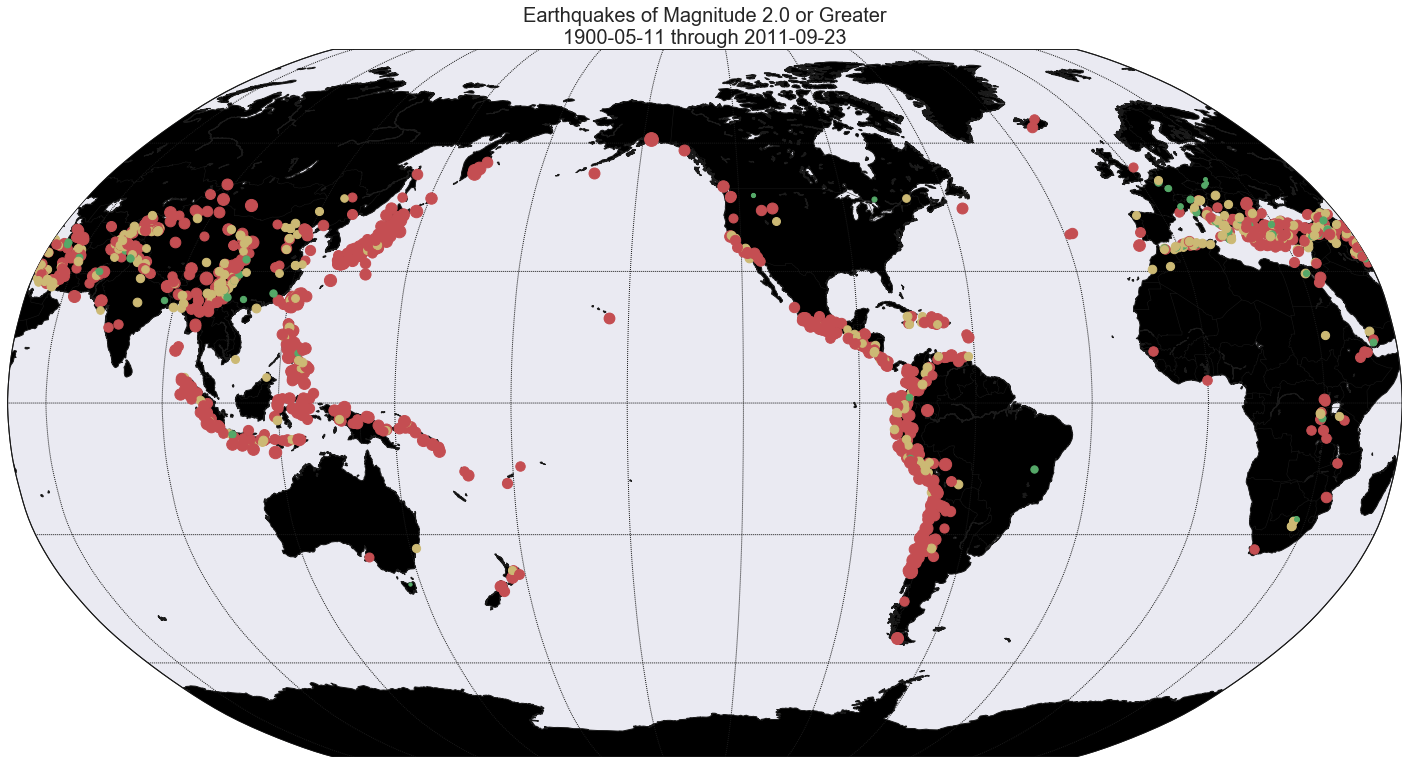

In [473]:
#BUILD THE MAP
#lets add color to the dots. green will mean less that 3magnituede, yellow if its less that 5. and red for rest
def get_color(magnitudes):
    # Returns green for small earthquakes, yellow for moderate
    #  earthquakes, and red for significant earthquakes.
    if magnitudes < 5.0:
        return ('go')
    elif magnitudes < 6.0:
        return ('yo')
    else:
        return ('ro')
    
    
# Make this plot larger.
plt.figure(figsize=(25,25))

##THE MAP##
eq_map = Basemap(projection='robin', resolution = 'l', area_thresh = 1000.0,
              lat_0=0, lon_0=-130)
eq_map.drawcoastlines()
#Let’s add country border
eq_map.drawcountries()
eq_map.fillcontinents(color = 'black')

#Now let’s clean up the edge of the globe
eq_map.drawmapboundary()#(fill_color='aqua')
#Now let’s draw latitude and longitude lines
eq_map.drawmeridians(np.arange(0, 360, 30))
eq_map.drawparallels(np.arange(-90, 90, 30))

#set it to where the dot size is adjusted to magnitude 
min_marker_size = 1.5
for lon, lat, mag in zip(lons, lats, magnitudes):
    x,y = eq_map(lon, lat)
    msize = mag * min_marker_size
    marker_string = get_color(mag)
    eq_map.plot(x, y, marker_string, markersize=msize)
#Our title needs to include the date range for these earthquakes, which requires us to pull in a little more
#data when we parse the raw text. To make the title, we'll use the dates of the first and last earthquakes.
#Since the file includes the most recent earthquakes first, we need to use the last items as the starting date:    
title_string = "Earthquakes of Magnitude 2.0 or Greater\n"
title_string += "%s through %s" % (timestrings[0][:10], timestrings[-1][:10])
plt.title(title_string,fontsize=20);

In [65]:
#read in the clean data file 
occurence=pd.read_csv('data/earth_table.csv')

In [ ]:
#change a few country names

In [66]:
occurence.head()

Origin_(UTC)    country   Lat   Long  Depth_(km)  Magnitude  \
0  1900-05-11 17:23:00      Japan  38.7  141.1         5.0        7.0   
1  1900-07-12 06:25:00     Turkey  40.3   43.1         NaN        5.9   
2  1900-10-29 09:11:00  Venezuela  11.0  -66.0         0.0        7.7   
3  1901-02-15 00:00:00      China  26.0  100.1         0.0        6.5   
4  1901-03-31 07:11:00   Bulgaria  43.4   28.7         NaN        6.4   

  Secondary_Effects  PDE_Shaking_Deaths  PDE_Total_Deaths  Utsu_Total_Deaths  \
0               NaN                 NaN               NaN                NaN   
1               NaN                 NaN               NaN              140.0   
2               NaN                 NaN               NaN                NaN   
3               NaN                 NaN               NaN                NaN   
4               NaN                 NaN               NaN                4.0   

   EM-DAT_Total_Deaths  Other_Source_Deaths  highest_death  year  
0                  NaN                  NaN            NaN  1900  
1                  NaN                  NaN          140.0  1900  
2                  NaN                  NaN            NaN  1900  
3                  NaN                  NaN            NaN  1901  
4                  NaN                  NaN            4.0  1901

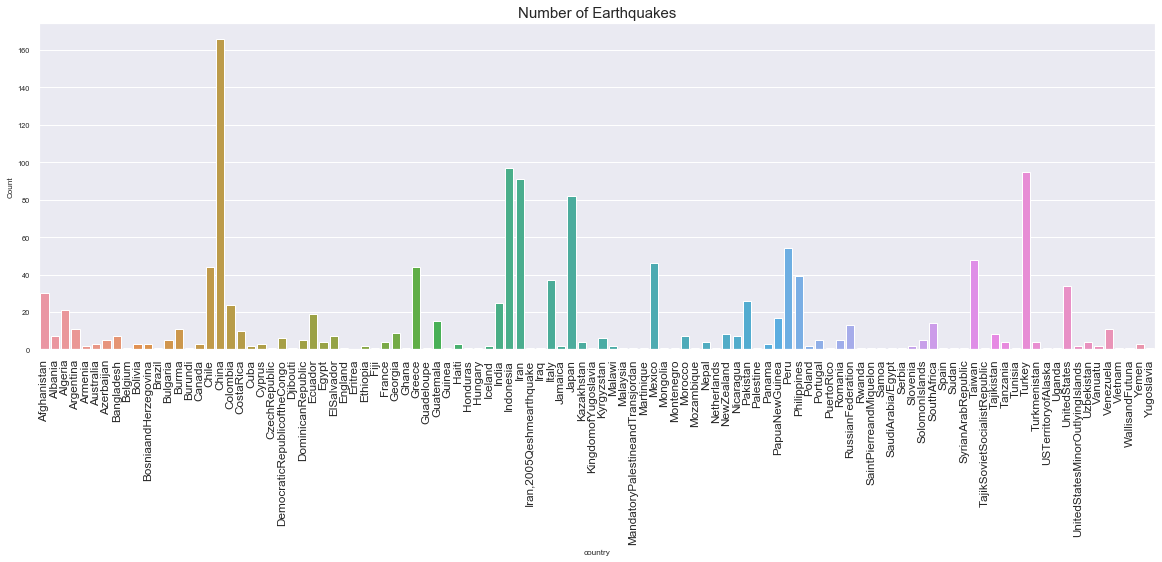

In [146]:
country=occurence.groupby('country',as_index=None)[['Magnitude']].count()
country=country.rename(columns={'Magnitude':'Count'})
#this makes the figure bigger 
plt.figure(figsize=(20, 6))
sns.set(font_scale=.68)

sns.barplot(x="country", y="Count", data=country).set_title('Number of Earthquakes',fontsize=15)
plt.xticks(
    rotation=90, 
    horizontalalignment='center',
    fontweight='light',
    fontsize='x-large'  
);

In [189]:
#zooom in to the top 20 coutires with the most earthquakes in the century.
the_20=country.nlargest(n=20,columns='Count')


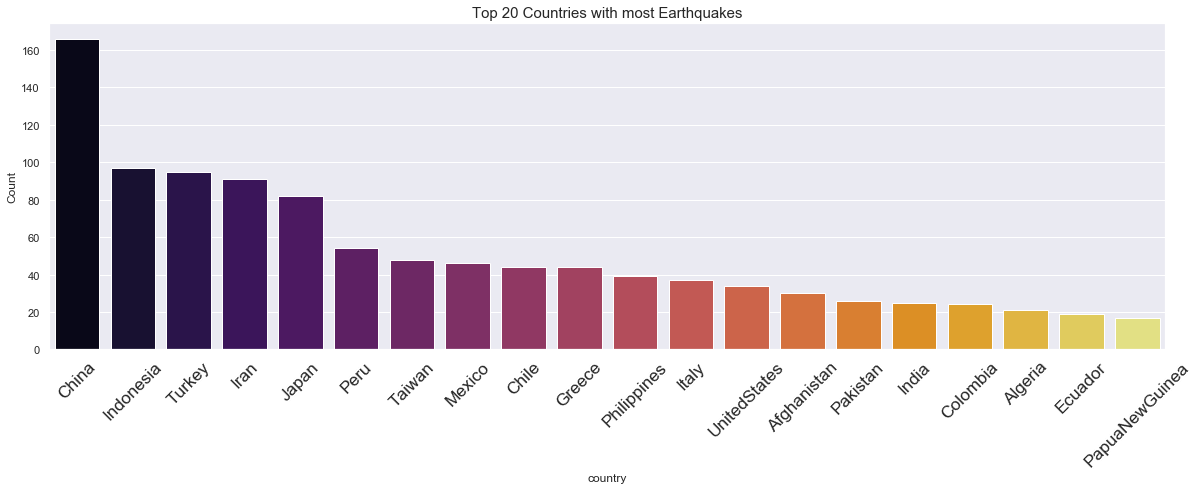

In [190]:
#plot the top 20
plt.figure(figsize=(20, 6))
sns.set(font_scale=1)

sns.barplot(x="country", y="Count", data=the_20,palette='inferno').set_title('Top 20 Countries with most Earthquakes',fontsize=15)
plt.xticks(
    rotation=45, 
    horizontalalignment='center',
    fontweight='light',
    fontsize='x-large'  
);


In [200]:
occurence.head()

Origin_(UTC)    country   Lat   Long  Depth_(km)  Magnitude  \
0  1900-05-11 17:23:00      Japan  38.7  141.1         5.0        7.0   
1  1900-07-12 06:25:00     Turkey  40.3   43.1         NaN        5.9   
2  1900-10-29 09:11:00  Venezuela  11.0  -66.0         0.0        7.7   
3  1901-02-15 00:00:00      China  26.0  100.1         0.0        6.5   
4  1901-03-31 07:11:00   Bulgaria  43.4   28.7         NaN        6.4   

  Secondary_Effects  PDE_Shaking_Deaths  PDE_Total_Deaths  Utsu_Total_Deaths  \
0               NaN                 NaN               NaN                NaN   
1               NaN                 NaN               NaN              140.0   
2               NaN                 NaN               NaN                NaN   
3               NaN                 NaN               NaN                NaN   
4               NaN                 NaN               NaN                4.0   

   EM-DAT_Total_Deaths  Other_Source_Deaths  highest_death  year  
0                  NaN                  NaN            NaN  1900  
1                  NaN                  NaN          140.0  1900  
2                  NaN                  NaN            NaN  1900  
3                  NaN                  NaN            NaN  1901  
4                  NaN                  NaN            4.0  1901

In [218]:
from ipywidgets import interact

@interact(Year = occurence.year.dropna().unique())
def show(Year):
   
    data=occurence.loc[occurence.year==Year][['country','highest_death']]
    data.plot.bar(x='country',y='highest_death')
    plt.ylabel('Highest Deaths')

interactive(children=(Dropdown(description='Year', options=(1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 19…

In [497]:
import plotly.express as px

gapminder=px.data.gapminder()

px.scatter(occurence,x='highest_death',y='Magnitude',animation_frame='year',
          hover_name='country',color='Magnitude',
          size_max=55,range_x=[1,500],range_y=[1,10])
    

### Question 2 ###

In [287]:
url= 'https://earthquake.usgs.gov/fdsnws/event/1/query.csv?starttime=1900-01-01%2000:00:00&endtime=2019-10-15%2023:59:59&maxlatitude=38.204&minlatitude=34.125&maxlongitude=-79.541&minlongitude=-90.879&minmagnitude=0.5&orderby=time-asc' 

In [289]:
r = requests.get(url)

In [290]:
print(r.url)

https://earthquake.usgs.gov/fdsnws/event/1/query.csv?starttime=1900-01-01%2000:00:00&endtime=2019-10-15%2023:59:59&maxlatitude=38.204&minlatitude=34.125&maxlongitude=-79.541&minlongitude=-90.879&minmagnitude=0.5&orderby=time-asc


In [291]:
r.status_code

200

In [292]:
print(r.text)

time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
1903-02-09T00:21:00.000Z,37.8,-89.3,,4.9,fa,,,,,ushis,ushis414,2018-06-04T20:43:44.000Z,"Illinois",earthquake,,,,,reviewed,ushis,sc
1903-11-04T18:18:00.000Z,36.5,-89.5,,4.6,fa,,,,,ushis,ushis422,2018-06-04T20:43:44.000Z,"Tennessee",earthquake,,,,,reviewed,ushis,sc
1903-11-04T19:14:00.000Z,36.5,-89.8,,5.1,fa,,,,,ushis,ushis423,2018-06-04T20:43:44.000Z,"Missouri",earthquake,,,,,reviewed,ushis,sc
1905-08-22T05:08:00.000Z,37.2,-89.3,,4.8,fa,,,,,ushis,ushis439,2018-06-04T20:43:44.000Z,"Illinois",earthquake,,,,,reviewed,ushis,sc
1909-10-23T07:10:00.000Z,37,-89.5,,4.5,fa,,,,,ushis,ushis494,2018-06-04T20:43:44.000Z,"Missouri",earthquake,,,,,reviewed,ushis,bar
1913-01-01T18:28:00.000Z,34.7,-81.7,,4.8,fa,,,,,ushis,ushis544,2018-06-04T20:43:44.000Z,"South Carolina",earthquake,,,,,reviewed,ushis,sc
1913-03-28T21:50:00.000Z,36.2,-83.7,,4.1,f

In [378]:
#First, we can read the text into a DataFrame using read_csv
#Another way to make it work is to pass the url itself to read_csv.
eq = pd.read_csv(r.url)
eq.head()

time  latitude  longitude  depth  mag magType  nst  \
0  1903-02-09T00:21:00.000Z      37.8      -89.3    NaN  4.9      fa  NaN   
1  1903-11-04T18:18:00.000Z      36.5      -89.5    NaN  4.6      fa  NaN   
2  1903-11-04T19:14:00.000Z      36.5      -89.8    NaN  5.1      fa  NaN   
3  1905-08-22T05:08:00.000Z      37.2      -89.3    NaN  4.8      fa  NaN   
4  1909-10-23T07:10:00.000Z      37.0      -89.5    NaN  4.5      fa  NaN   

   gap  dmin  rms  ...                   updated      place        type  \
0  NaN   NaN  NaN  ...  2018-06-04T20:43:44.000Z   Illinois  earthquake   
1  NaN   NaN  NaN  ...  2018-06-04T20:43:44.000Z  Tennessee  earthquake   
2  NaN   NaN  NaN  ...  2018-06-04T20:43:44.000Z   Missouri  earthquake   
3  NaN   NaN  NaN  ...  2018-06-04T20:43:44.000Z   Illinois  earthquake   
4  NaN   NaN  NaN  ...  2018-06-04T20:43:44.000Z   Missouri  earthquake   

  horizontalError depthError  magError  magNst    status  locationSource  \
0             NaN        NaN       NaN     NaN  reviewed           ushis   
1             NaN        NaN       NaN     NaN  reviewed           ushis   
2             NaN        NaN       NaN     NaN  reviewed           ushis   
3             NaN        NaN       NaN     NaN  reviewed           ushis   
4             NaN        NaN       NaN     NaN  reviewed           ushis   

  magSource  
0        sc  
1        sc  
2        sc  
3        sc  
4       bar  

[5 rows x 22 columns]

In [379]:
eq.place=eq.place.str.replace(' ','_')

In [380]:
#for t in eq.place:
def tn_state(t):
    tn_split=str(t).split('_')
    if len(tn_split)==1:
        state=t
    else:
        state=tn_split[-1]
    return state
        

In [381]:
%%time
eq.place=eq.place.apply(tn_state)

CPU times: user 13.8 ms, sys: 1.05 ms, total: 14.8 ms
Wall time: 14.4 ms


In [382]:
#give me just the data for TN only 
tennessee=eq[eq.place=='Tennessee']

In [383]:
tennessee.head()

time  latitude  longitude  depth  mag magType  nst  \
1   1903-11-04T18:18:00.000Z    36.500    -89.500    NaN  4.6      fa  NaN   
6   1913-03-28T21:50:00.000Z    36.200    -83.700    NaN  4.1      fa  NaN   
11  1918-10-16T02:15:00.000Z    36.000    -89.200    NaN  4.5      fa  NaN   
20  1928-11-03T04:02:50.200Z    36.112    -82.828    5.0  4.5      lg  NaN   
26  1955-03-29T09:02:40.000Z    36.000    -89.500    NaN  3.9      fa  NaN   

    gap  dmin  rms  ...                   updated      place        type  \
1   NaN   NaN  NaN  ...  2018-06-04T20:43:44.000Z  Tennessee  earthquake   
6   NaN   NaN  NaN  ...  2018-06-04T20:43:44.000Z  Tennessee  earthquake   
11  NaN   NaN  NaN  ...  2018-06-04T20:43:44.000Z  Tennessee  earthquake   
20  NaN   NaN  NaN  ...  2018-06-04T20:43:44.000Z  Tennessee  earthquake   
26  NaN   NaN  NaN  ...  2018-06-04T20:43:44.000Z  Tennessee  earthquake   

   horizontalError depthError  magError  magNst    status  locationSource  \
1              NaN        NaN       NaN     NaN  reviewed           ushis   
6              NaN        NaN       NaN     NaN  reviewed           ushis   
11             NaN        NaN       NaN     NaN  reviewed           ushis   
20             NaN        NaN       NaN     NaN  reviewed           ushis   
26             NaN        NaN       NaN     NaN  reviewed           ushis   

   magSource  
1         sc  
6         sc  
11        sg  
20        dg  
26        sc  

[5 rows x 22 columns]

In [384]:
#remove lots of random columns
tennessee= tennessee.drop(columns= ['nst','gap','dmin','rms','updated','horizontalError',
                                   'depthError','magError','magNst','status','locationSource','magSource',
                                   'net','id','magType'])

In [385]:
#converted the time section to datetime type
tennessee['time']=pd.to_datetime(tennessee['time'])
#add a column with just year
tennessee['year']=tennessee['time'].dt.year

In [387]:
tennessee.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4428 entries, 1 to 10114
Data columns (total 8 columns):
time         4428 non-null datetime64[ns, UTC]
latitude     4428 non-null float64
longitude    4428 non-null float64
depth        4424 non-null float64
mag          4428 non-null float64
place        4428 non-null object
type         4428 non-null object
year         4428 non-null int64
dtypes: datetime64[ns, UTC](1), float64(4), int64(1), object(2)
memory usage: 311.3+ KB


In [388]:
tennessee.columns

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'place', 'type',
       'year'],
      dtype='object')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


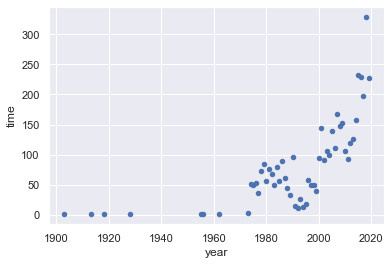

In [394]:
tennessee.groupby('year',as_index=None)[['time']].count().plot(kind='scatter',x='year',y='time');

In [348]:
tennessee.groupby('type')[['mag']].count()

mag
type              
earthquake    4427
quarry blast     1

### expert the TN data###

In [456]:
#exported my TN dataframe to use for other steps
TN_data=tennessee.to_csv('data/tn_data.csv',index=None)

In [457]:
tn_data=pd.read_csv('data/tn_data.csv')

In [485]:
# Open the TN data file.
TN_data = 'data/tn_data.csv'

# Create empty lists for the latitudes and longitudes.
tn_lat, tn_lon = [], []
tn_mag=[]

# Read through the entire file, skip the first line,
#  and pull out just the lats and lons.
with open(TN_data) as t:
    # Create a csv reader object.
    reader_tn = csv.reader(t)
    
    # Ignore the header row.
    next(reader_tn)
    
    # Store the latitudes and longitudes in the appropriate lists.
    for row in reader_tn:
        tn_lat.append(float(row[1]))
        tn_lon.append(float(row[2]))
        tn_mag.append(float(row[4]))

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning:


The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning:


The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning:


The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.



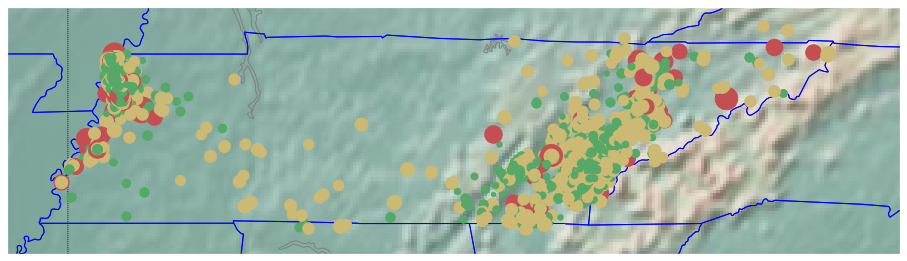

In [495]:
def color_mix(tn_mag):
    # Returns green for small earthquakes, yellow for moderate
    #  earthquakes, and red for significant earthquakes.
    if tn_mag < 2:
        return ('go')
    elif tn_mag < 3:
        return ('yo')
    else:
        return ('ro')


# Make this plot larger.
plt.figure(figsize=(16,9))

tn_map = Basemap(projection='merc',resolution='h', area_thresh=.1,
                 llcrnrlon=-90.661706,
                 llcrnrlat=34.728965,
                 urcrnrlon=-80.9296,
                 urcrnrlat=36.914326)
 
tn_map.shadedrelief()
tn_map.drawcoastlines(color='gray')
tn_map.drawcountries(color='gray')
tn_map.drawstates(color='blue',linewidth=1)    
    

tn_map.drawmeridians(np.arange(0, 360, 30))
tn_map.drawparallels(np.arange(-90, 90, 30));

tn_size = 5
for lonn, latt, magg in zip(tn_lon, tn_lat, tn_mag):
    a,b = tn_map(lonn, latt)
    msize_tn = magg * tn_size
    color_marker = color_mix(magg)
    tn_map.plot(a, b, color_marker, markersize=msize_tn)